In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\HOME'

In [3]:
os.chdir('C:\\Users\\HOME\\datasets')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
flight_data=pd.read_csv("Clean_Dataset.csv")
flight_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
type(flight_data)

pandas.core.frame.DataFrame

In [8]:
flight_data.shape

(300153, 12)

CHECKING FOR NULL VALUES IF ANY

In [9]:
flight_data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

REMOVING THE UNWANTED COLUMNS

In [10]:
flight_data=flight_data.drop('Unnamed: 0', axis = 1)

In [11]:
flight_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


TOTAL NUMBER OF FLIGHTS RUN BY EACH ARILINE COMPANY

In [12]:
flight_count=pd.DataFrame(flight_data['airline'].value_counts()).reset_index()
flight_count=flight_count.rename(columns={'index':'airlines','airline':'number of flights'})
flight_count

,airlines,number of flights
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


WHETHER PRICE VARIES WITH DIFFERENT AIRLINES

<AxesSubplot:xlabel='airline', ylabel='price'>

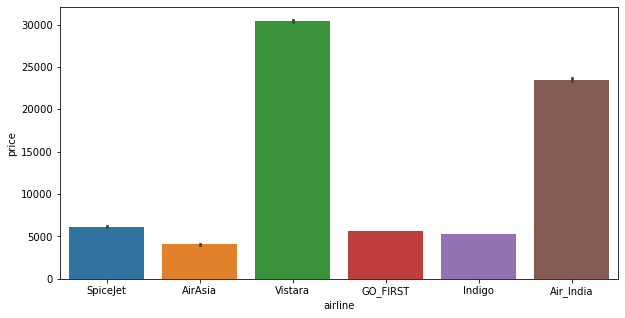

In [13]:
#how price varies for different airlines
plt.figure(figsize=(10,5))
sns.barplot(data=flight_data,x='airline',y='price')


Vistara's and AirIndia's tickets are priced high compared to other airlies

DIFFERENCE BETWEEN NUMBER OF DAYS LEFT FOR DEPARTURE AND DATE OF BOOKING 

<AxesSubplot:xlabel='days_left', ylabel='price'>

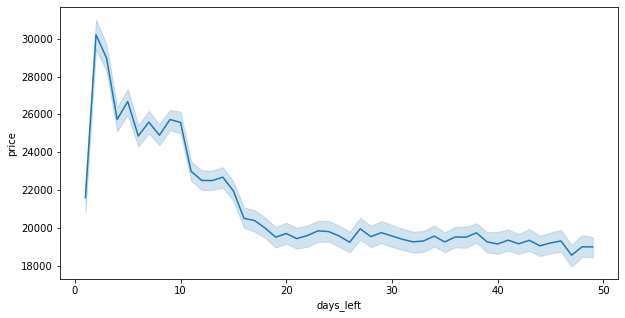

In [14]:
#how number of days left for departure affect price 
plt.figure(figsize=(10,5))
sns.lineplot(data=flight_data,x='days_left',y='price')

The tickets bought in just 1 0r 2 days before departure are priced high compared to the tickets booked in advance

THE CHOICE OF CLASS AND TICKET PRICE 

Text(0.5, 1.0, 'relation between class an price')

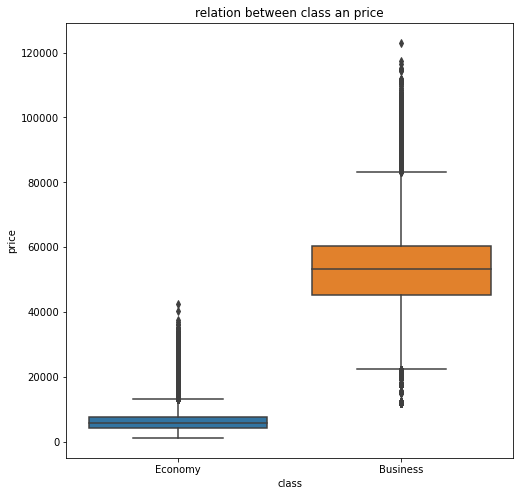

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(data=flight_data,x="class",y="price")
plt.title('relation between class an price')

Business class tickets are costlier compared to economy class tickets

HOW SOURCE AND DESTINATION CHANGE AFFECT THE TICKET PRICE

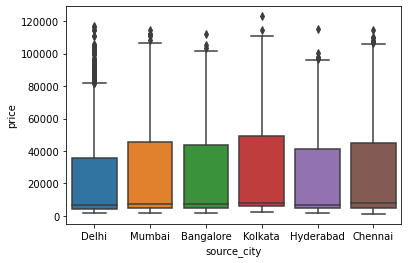

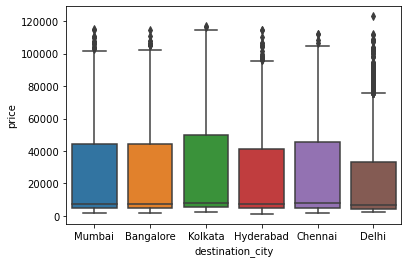

In [16]:
sns.boxplot(data=flight_data,x='source_city',y='price')
plt.show()
sns.boxplot(data=flight_data,x='destination_city',y='price')
plt.show()

Tickets to and from Kolkata are priced high compared to other location

HOW ARRIVAL AND DEPARTURE TIME AFFECT TICKET PRICE

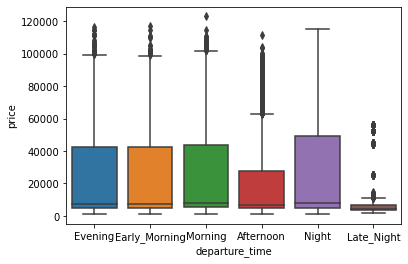

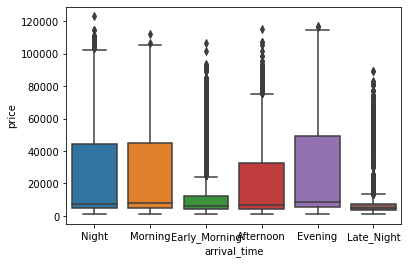

In [17]:
sns.boxplot(data=flight_data,x='departure_time',y='price')
plt.show()
sns.boxplot(data=flight_data,x='arrival_time',y='price')
plt.show()

The ticket price is higher when the departure time is at night and lower when it is late night compared to other timings, while it is higher when the arrival time is evening and lower when it is late night.Late night tickets are priced the lowest.

BUILIDING A MODEL FOR FLIGHT PRICE PREDICTION

In [18]:
data_flight=flight_data.copy()

In [19]:
data_flight=data_flight.drop('flight',axis=1)
data_flight

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [20]:
data_f=pd.get_dummies(data_flight,columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'],drop_first=True)
data_f

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
300149,10.42,49,77105,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300150,13.83,49,79099,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300151,10.00,49,81585,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [21]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(data_f,test_size=0.3,random_state=100)

In [22]:
df_train.shape

(210107, 31)

In [23]:
df_test.shape

(90046, 31)

In [24]:
y_train=df_train.price
x_train=df_train.drop(['price'],axis=1)

y_test=df_test.price
x_test=df_test.drop(['price'],axis=1)

In [25]:
x_train.shape

(210107, 30)

FITTING THE MODEL USING RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
from sklearn import metrics
train_predicted=model.predict(x_test)
train_predicted

array([13775.975     ,  4079.81      ,  6340.53666667, ...,
        9373.97333333,  4590.6       ,  3188.28      ])

CHECKING THE GOODNESS OF FIT

In [33]:
metrics.r2_score(y_test,train_predicted)

0.9847955635861996

In [ ]:
flight_data.to_csv('output.csv')

LINK TO TABLEAU DASHBOARD

In [ ]:
https://public.tableau.com/views/internproject_16740464631600/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link